<a href="https://colab.research.google.com/github/lionheart7dec/playing_with_mnist/blob/master/CNN_on_mnist_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
from tensorflow.keras.datasets import mnist

In [0]:
(x_train, y_train), (x_test, y_test)=mnist.load_data()

In [0]:
x_train.shape

(60000, 28, 28)

In [0]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

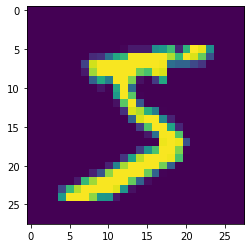

In [0]:
plt.imshow(x_train[0])

In [0]:
from tensorflow.keras.utils import to_categorical

In [0]:
y_train.shape

(60000,)

In [0]:
y_example = to_categorical(y_train)

In [0]:
y_example

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

In [0]:
y_example.shape

(60000, 10)

In [0]:
y_cat_test = to_categorical(y_test, num_classes = 10)

In [0]:
y_cat_train = to_categorical(y_train, 10)

In [0]:
x_train[0].max()

255

In [0]:
x_train[0].min()

0

In [0]:
x_train = x_train/255
x_test = x_test/255

In [0]:
scaled_image = x_train[0]

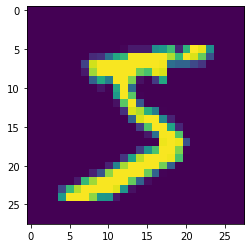

In [0]:
plt.imshow(scaled_image) 

In [0]:
#batch_size, width, height, color_channels
x_train = x_train.reshape(60000,28,28,1)

In [0]:
x_test = x_test.reshape(10000, 28, 28,1)

In [0]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, MaxPool2D

In [0]:
#####################################################################


#model=Sequential()

model.add(Conv2D(256, (3,3),  input_shape = (28, 28,1), activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(256, (3,3), activation('relu')))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(256, (3,3), activation('relu')))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(256), activation('relu'))

model.add(Dense(10))
model.add(Activation('softmax'))

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
                metrics=['accuracy']
              )
model.fit(x_train, y_cat_train, epochs=10, validation_split=0.1)

############################################################

In [0]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(4,4), input_shape = (28, 28,1), activation='relu'))

model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(128, activation='relu'))


#Output layer
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer = 'adam', metrics=['accuracy'])

In [0]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor= 'val_loss', patience=1)

In [0]:
model.fit(x_train, y_cat_train, epochs=20, validation_data=(x_test, y_cat_test), callbacks=[early_stop])

Epoch 1/20
1875/1875 [==============================] - 31s 17ms/step - loss: 0.1388 - accuracy: 0.9585 - val_loss: 0.0520 - val_accuracy: 0.9825
Epoch 2/20
1875/1875 [==============================] - 31s 17ms/step - loss: 0.0472 - accuracy: 0.9853 - val_loss: 0.0382 - val_accuracy: 0.9873
Epoch 3/20
1875/1875 [==============================] - 31s 17ms/step - loss: 0.0304 - accuracy: 0.9905 - val_loss: 0.0499 - val_accuracy: 0.9853


In [0]:
metrics = pd.DataFrame(model.history.history)

In [0]:
metrics

,loss,accuracy,val_loss,val_accuracy
0,0.824743,0.752950,0.376779,0.8898
1,0.354178,0.895183,0.308951,0.9078
2,0.309692,0.909550,0.278009,0.9172
3,0.278621,0.918633,0.257729,0.9253
4,0.253596,0.925817,0.232323,0.9315
5,0.231994,0.931483,0.221820,0.9353
6,0.215350,0.936533,0.200739,0.9405
7,0.199568,0.941650,0.187981,0.9447
8,0.187242,0.944317,0.180436,0.9452
9,0.175279,0.949150,0.167676,0.9507


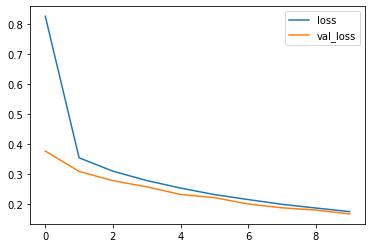

In [0]:
metrics[['loss', 'val_loss']].plot()

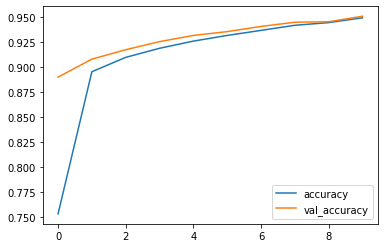

In [0]:
metrics[['accuracy','val_accuracy']].plot()

In [0]:
from sklearn.metrics import classification_report, confusion_matrix

In [0]:
predicitions = model.predict_classes(x_test)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


In [0]:
print(classification_report(y_test, predicitions))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97       980
           1       0.98      0.98      0.98      1135
           2       0.94      0.94      0.94      1032
           3       0.94      0.92      0.93      1010
           4       0.96      0.95      0.95       982
           5       0.94      0.93      0.94       892
           6       0.96      0.97      0.97       958
           7       0.95      0.96      0.96      1028
           8       0.94      0.93      0.94       974
           9       0.93      0.93      0.93      1009

    accuracy                           0.95     10000
   macro avg       0.95      0.95      0.95     10000
weighted avg       0.95      0.95      0.95     10000



In [0]:
confusion_matrix(y_test, predicitions)

array([[ 970,    0,    0,    1,    0,    4,    0,    1,    3,    1],
       [   0, 1115,    3,    1,    0,    1,    4,    2,    9,    0],
       [  10,    2,  973,   15,    6,    3,    4,    7,    8,    4],
       [   6,    1,   20,  931,    0,   17,    0,   12,   15,    8],
       [   2,    0,   12,    0,  928,    1,    7,    4,    1,   27],
       [  11,    2,    2,   16,    3,  830,    8,    6,    8,    6],
       [   5,    2,    3,    2,    5,   10,  928,    0,    3,    0],
       [   1,    4,   17,    3,    1,    1,    0,  986,    2,   13],
       [   5,    2,    2,   13,    6,   11,   11,    4,  909,   11],
       [   8,    5,    1,    9,   21,    5,    1,   14,    8,  937]])

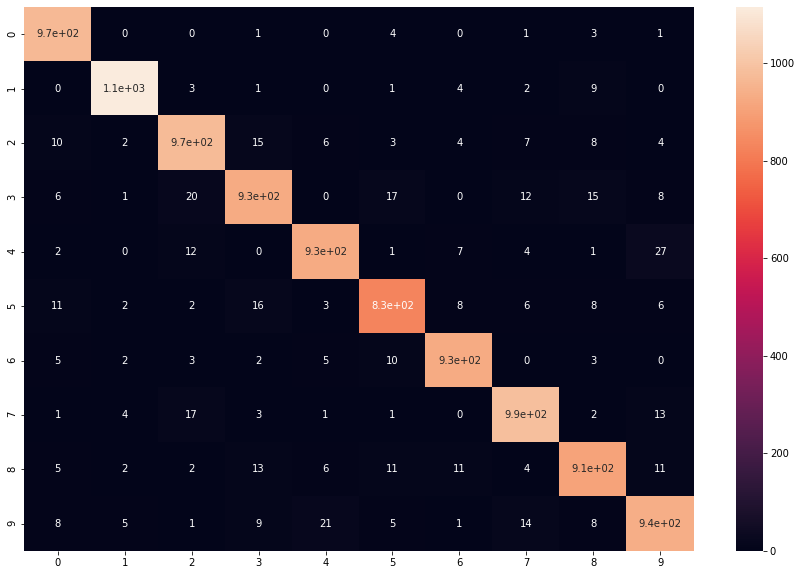

In [0]:
plt.figure(figsize=(15, 10))
sns.heatmap(confusion_matrix(y_test, predicitions), annot = True)

In [0]:
my_number = x_test[0]

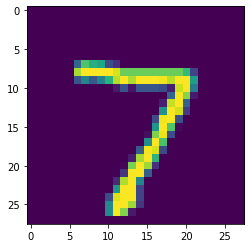

In [0]:
plt.imshow(my_number.reshape(28,28))

In [0]:
#num_images, width, height, color_channels
model.predict_classes(my_number.reshape(1,28,28,1))

array([7])